<a href="https://colab.research.google.com/github/AngelikaBaloy/scratchpad/blob/main/ds3001_1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.20 class

In [1]:
! git clone https://github.com/AngelikaBaloy/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 37 (delta 7), reused 3 (delta 3), pack-reused 27 (from 1)
Receiving objects: 100% (37/37), 61.71 KiB | 6.86 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Download complete
Extracting data files...
Data extracted


In [3]:
import pandas as pd

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [9]:
df.dtypes

,0
Host Id,int64
Host Since,object
Name,object
Neighbourhood,object
Property Type,object
Review Scores Rating (bin),float64
Room Type,object
Zipcode,float64
Beds,float64
Number of Records,int64


In [8]:
df.shape

(30478, 13)

<Axes: >

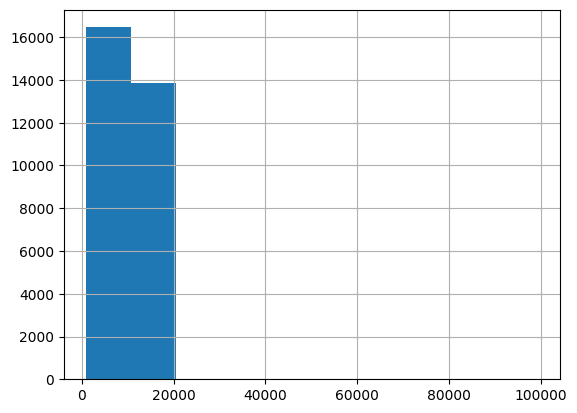

In [11]:
df['Zipcode'].hist()

In [12]:
df['Number Of Reviews'].describe()

,Number Of Reviews
count,30478.000000
mean,12.018735
std,21.980703
min,0.000000
25%,0.000000
50%,3.000000
75%,13.000000
max,257.000000


In [13]:
df['Review Scores Rating (bin)'].describe()

,Review Scores Rating (bin)
count,22155.000000
mean,90.738659
std,9.059519
min,20.000000
25%,85.000000
50%,90.000000
75%,100.000000
max,100.000000


In [15]:
df['Review Scores Rating (bin)'].unique()

array([ nan,  95., 100.,  90.,  85.,  80.,  75.,  65.,  70.,  60.,  40.,
        50.,  20.,  55.,  45.,  30.])

In [16]:
df['Beds'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

<Axes: >

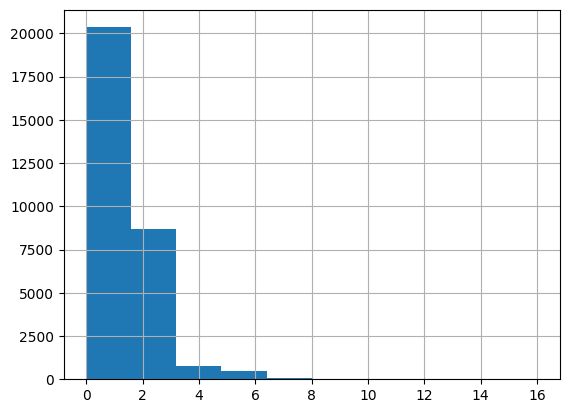

In [17]:
df['Beds'].hist()

In [18]:
df['Review Scores Rating'].isna()
# df['var_na'] = df[var].isna() creates a col that will indicate if the data is missing

,Review Scores Rating
0,True
1,True
2,True
3,True
4,False
...,...
30473,True
30474,True
30475,True
30476,True


dtype('int64')

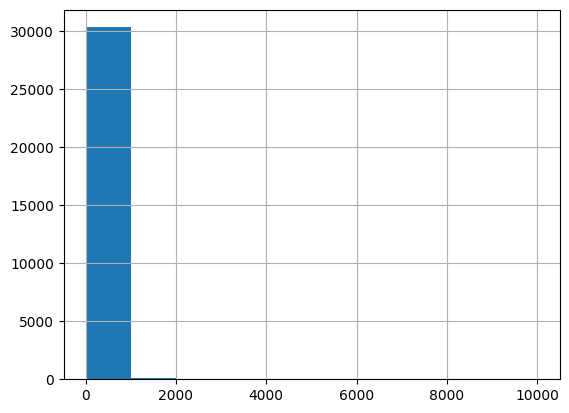

In [26]:
# cleaning a numeric variable
# df['Price'].str.replace(',','')     # removes the comma , but is still a string without a comma
df['Price'] = pd.to_numeric(df['Price'], errors ='coerce')

df['Price'].hist()
df['Price'].dtypes


In [4]:
df = pd.read_csv('/content/data/CardiacPatientData.csv', encoding='latin1')
df.head()

,ID,SBP,DBP,HR,RR,BT,SpO2,Age,Gender,GCS,Na,K,Cl,Urea,Ceratinine,Alcoholic,Smoke,FHCD,TriageScore,Outcome
0,1,163,95,90,18,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
1,1,134,85,85,15,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
2,1,121,77,80,19,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
3,1,103,78,70,16,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
4,1,96,70,59,13,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1


1.22

Imputation....

In [ ]:
# df['col_na'] = df['col'].isna()
# imputation_value = df['col'].median()

# df['col_imp'] = df['col'].fillna(imp_value)

In [6]:
df['DBP'].value_counts()

,count
DBP,
67,217
70,213
80,186
72,183
82,182
...,...
766,1
30,1
134,1


In [8]:
DBP_95 = df.loc[df['DBP'] == 95]
DBP_95.shape

(50, 20)

In [ ]:
# df.to_csv(path,index=False)
# saving the data

<Axes: xlabel='DBP', ylabel='Count'>

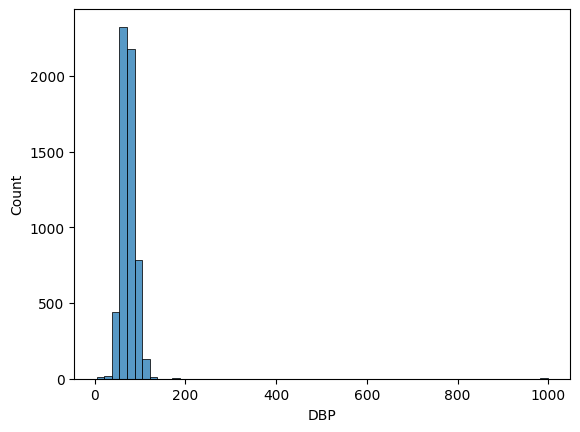

In [13]:
import seaborn as sns

sns.histplot(df['DBP'], bins=60)

<Axes: xlabel='DBP', ylabel='Count'>

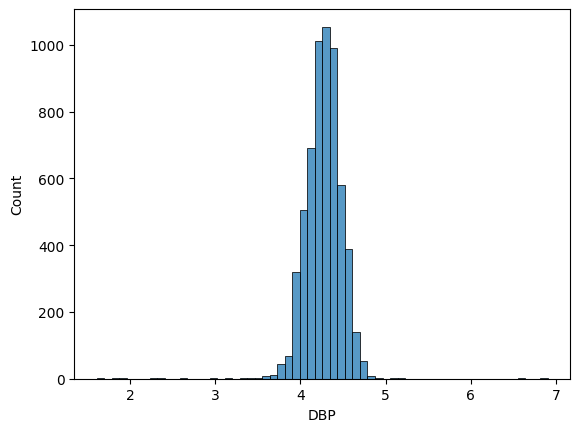

In [16]:
import numpy as np
log_DBP = np.log(df['DBP']) # data transformation- log ; gets rid of aggressively ugly skew
sns.histplot(log_DBP, bins=60)


<Axes: xlabel='DBP', ylabel='Density'>

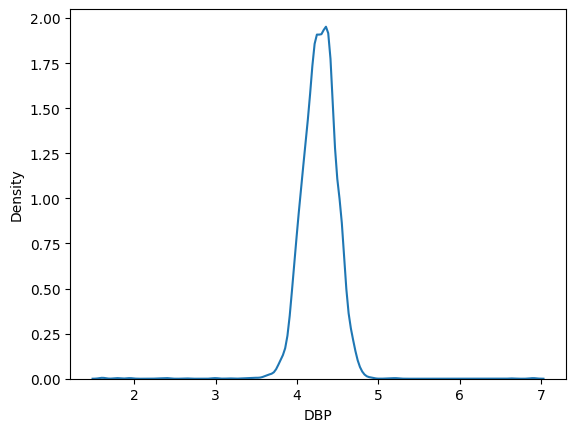

In [17]:
sns.kdeplot(log_DBP) # smooths out the bins

In [21]:
df['Urea'].value_counts()
df['Urea'].describe()

,Urea
count,2586.000000
mean,40.648492
std,27.580426
min,9.000000
25%,28.000000
50%,38.000000
75%,41.000000
max,378.000000


In [33]:
urea_new = df.loc[df['Urea'] < 200]
urea_new

,ID,SBP,DBP,HR,RR,BT,SpO2,Age,Gender,GCS,Na,K,Cl,Urea,Ceratinine,Alcoholic,Smoke,FHCD,TriageScore,Outcome
0,1,163,95,90,18,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
1,1,134,85,85,15,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
2,1,121,77,80,19,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
3,1,103,78,70,16,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
4,1,96,70,59,13,98,98,66,1,15,139.0,4.0,105.0,41.0,91.0,1.0,1.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,108,153,100,136,44,98,97,64,1,15,135.0,5.0,94.0,26.0,133.0,1.0,1.0,1.0,2.0,0
5796,109,153,100,90,24,98,100,83,0,15,133.0,5.0,100.0,40.0,174.0,0.0,0.0,0.0,3.0,0
5797,110,107,69,90,19,98,99,76,0,15,133.0,4.0,91.0,43.0,115.0,0.0,0.0,0.0,2.0,0
5889,111,101,70,101,18,98,67,31,1,15,139.0,4.0,102.0,40.0,103.0,0.0,0.0,1.0,3.0,0


<Axes: >

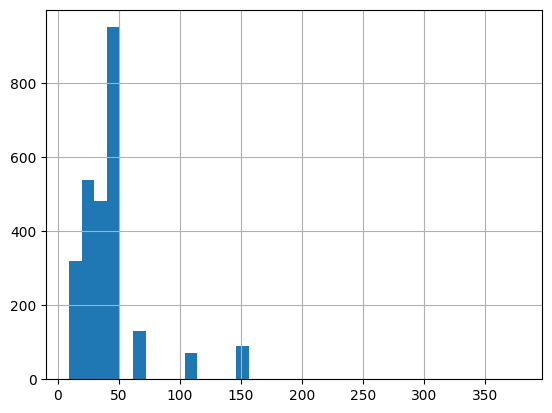

In [27]:
df['Urea'].hist(bins=35)


<Axes: xlabel='Urea', ylabel='Count'>

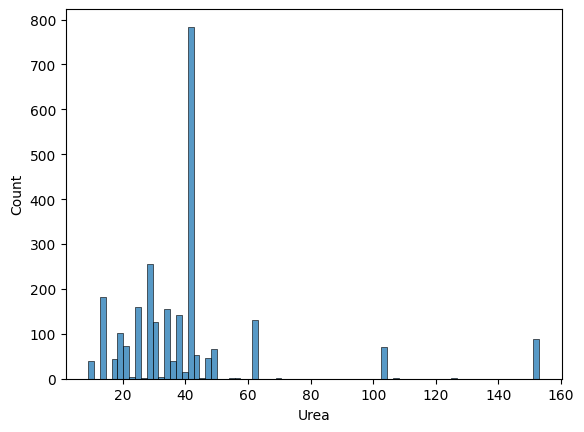

In [34]:
sns.histplot(urea_new['Urea'])

<Axes: xlabel='Urea', ylabel='Density'>

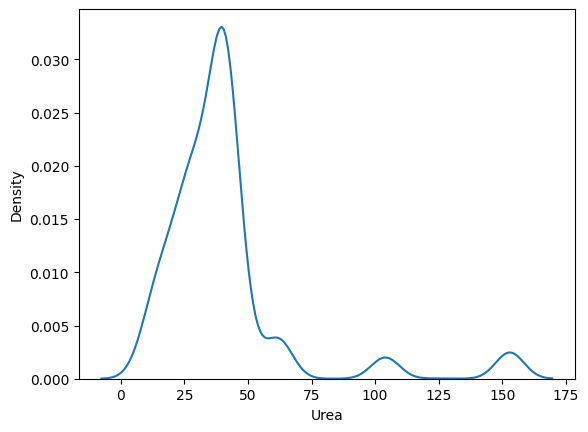

In [35]:
sns.kdeplot(urea_new['Urea'])